C:\Users\PaganM\Miniconda3\envs\nfi_test\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,64,66,67,68,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\PaganM\Miniconda3\envs\nfi_test\lib\site-packages\sklearn\neighbors\_kde.py:271: RuntimeWarning: divide by zero encountered in log
  log_density = self.tree_.kernel_density(


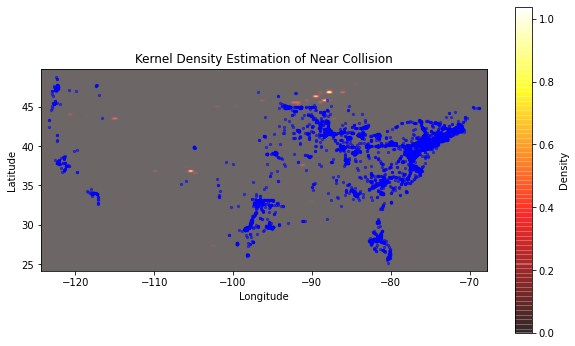

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Load your dataset
df = pd.read_csv('C:\\Users\\PaganM\\Desktop\\python\\accident_locations\\near_collision_counties.csv')

# Print the first few rows and column names to verify
# print("DataFrame columns:", df.columns)
# print("First few rows of DataFrame:\n", df.head())

# Drop rows with NaN values in any column
# df = df.dropna()

# Ensure the columns are in the correct format
# print("DataFrame shape after dropping NaN values:", df.shape)
# print("First few rows of cleaned DataFrame:\n", df.head())

# Prepare the data
data = {
    'latitude': df["latitude"],
    'longitude': df["longitude"],
    'near_integer': df['near_integer']
}

df = pd.DataFrame(data)

# Ensure there are no NaN values in longitude and latitude
df = df.dropna(subset=['longitude', 'latitude'])

coordinates = df[['longitude', 'latitude']].values
weights = df['near_integer'].values

# Perform KDE with a smaller bandwidth for more localized density estimation
kde = KernelDensity(kernel='gaussian', bandwidth=0.02).fit(coordinates, sample_weight=weights)  # Adjust bandwidth here

# Create a grid of points within the range of data
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
grid_coords = np.vstack([x.ravel(), y.ravel()]).T

# Evaluate the density model on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(x.shape)

# Create the heatmap data for folium
heat_data = np.vstack([y.ravel(), x.ravel(), density.ravel()]).T  # Note: folium uses [lat, lon, weight]

# Create a base map centered around the mean location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add HeatMap layer to the map with adjusted radius and blur
heat_map_data = [[row[0], row[1], row[2]] for row in heat_data if row[2] > np.percentile(density, 50)]
HeatMap(heat_map_data, radius=12, blur=3, max_zoom=1).add_to(m)  # Adjusted radius and blur

# Save map to an HTML file
m.save("smaller_hotspots_near_collision_heatmap.html")

# Optionally, visualize using matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.imshow(density, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='hot', alpha=0.6)
plt.colorbar(label='Density')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=5, alpha=0.5)
plt.title('Kernel Density Estimation of Near Collision')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\PaganM\Miniconda3\envs\nfi_test\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,64,66,67,68,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


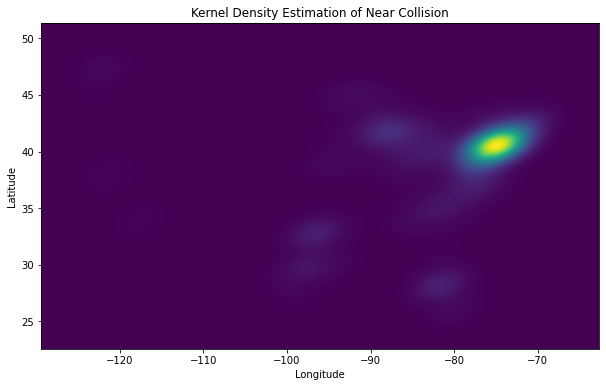

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('C:\\Users\\PaganM\\Desktop\\python\\accident_locations\\near_collision_counties.csv')

# Drop rows with NaN values in the necessary columns
# df = df.dropna(subset=['longitude', 'latitude', 'posted_integer'])

# Create a KDE plot using Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='longitude', y='latitude', fill=True, cmap='viridis', thresh=0, levels=100)
plt.title('Kernel Density Estimation of Near Collision')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot to a file
plt.savefig('kde_near_collision_county_histogram.jpg', dpi=300)

# Show the plot
plt.show()


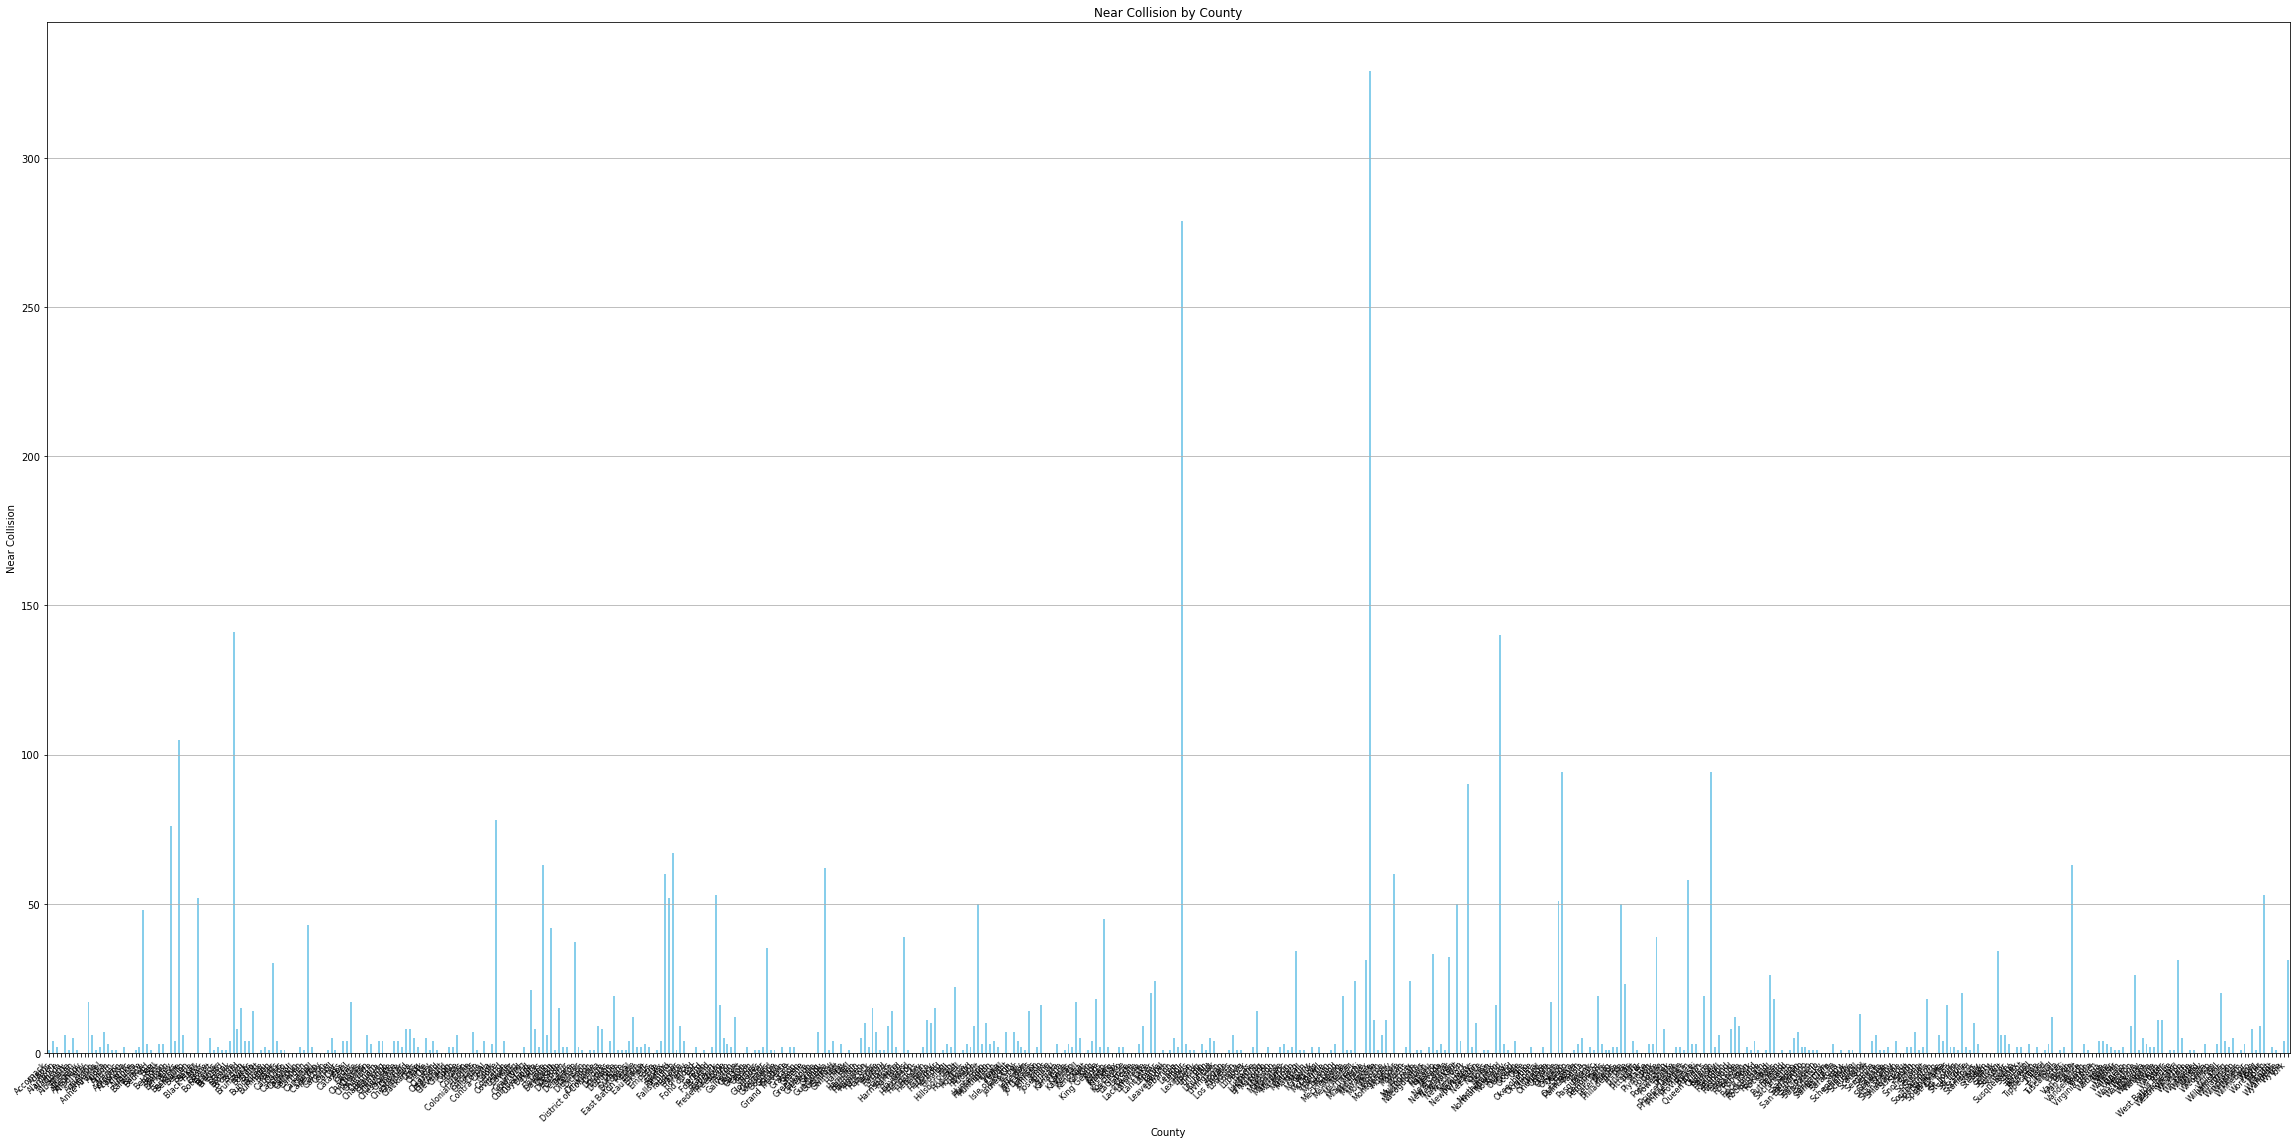

In [3]:
# Create histogram based on county names and suspected_collision counts with separated labels
# Aggregate suspected_collision counts by county name
speeding_by_county = df.groupby('NAME')['near_integer'].sum()
plt.figure(figsize=(32, 16))  # Increase the figure size for better separation of labels
speeding_by_county.plot(kind='bar', color='skyblue')
plt.title('Near Collision by County')
plt.xlabel('County')
plt.ylabel('Near Collision')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and adjust font size for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('speeding_by_county_histogram.jpg', dpi=300)  # Specify the file name and DPI
plt.show()


C:\Users\PaganM\Miniconda3\envs\nfi_test\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,64,66,67,68,69) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


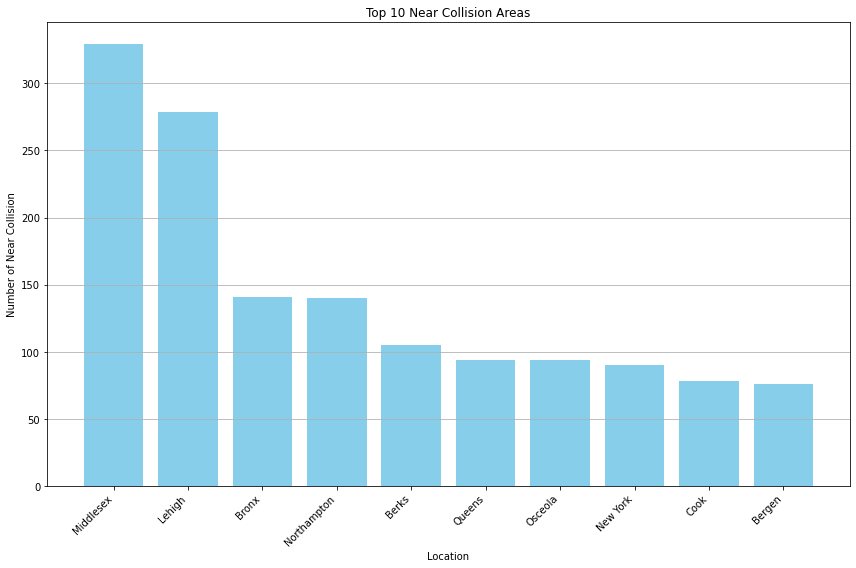

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('C:\\Users\\PaganM\\Desktop\\python\\accident_locations\\near_collision_counties.csv')

# Ensure there are no NaN values
#df['suspected_'] = df['suspected_'].fillna(0)  # Replace NaN values with zeros

# Group by 'NAME' and count the number of suspected collisions for each location
collision_counts = df.groupby('NAME')['near_integer'].sum().reset_index()

# Sort the counts in descending order
collision_counts = collision_counts.sort_values(by='near_integer', ascending=False)

# Select the top N locations (e.g., top 10)
top_n = 10
top_locations = collision_counts.head(top_n)

# Create a histogram
plt.figure(figsize=(12, 8))
plt.bar(top_locations['NAME'], top_locations['near_integer'], color='skyblue')
plt.title(f'Top {top_n} Near Collision Areas')
plt.xlabel('Location')
plt.ylabel('Number of Near Collision')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# Save the plot to a file
plt.savefig("top_most_near_collision_histogram.png")

# Show the plot
plt.show()


Filtered DataFrame shape: (4510, 75)
First few rows of the filtered DataFrame:
     field_1  group_level_4 vehicle_description driver_id  driver_home_group  \
0     88635            580              SL1376     UMPMI              580.0   
1     50078            805              232181   CARRO02              805.0   
8      5234            861              201121   HERJH01              861.0   
12   148978            861              211173   PETMA01              861.0   
13     2665            861              103028   DELRA01              861.0   

     latitude  longitude  near_collision  near_integer  year  ...  coachable_  \
0   33.193937 -87.606879            True             1  2023  ...         0.0   
1   42.643953 -86.189136            True             1  2024  ...         1.0   
8   40.682779 -75.313159            True             1  2024  ...         0.0   
12  40.664090 -75.384296            True             1  2023  ...         0.0   
13  40.664971 -75.384545            True

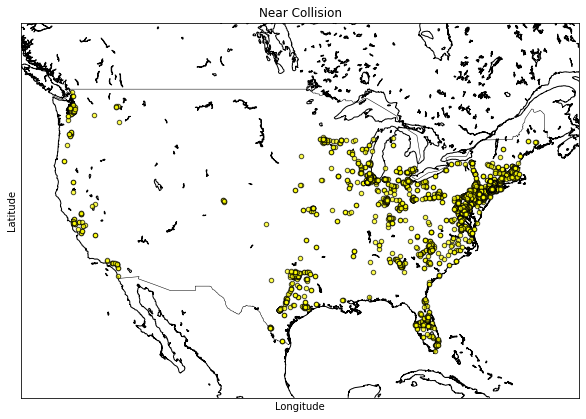

Map has been saved as near_collision_map.png


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load your dataset
df = pd.read_csv('C:\\Users\\PaganM\\Desktop\\python\\accident_locations\\near_collision_counties.csv')

# Ensure there are no NaN values in the necessary columns
df = df.dropna(subset=['longitude', 'latitude', 'near_integer'])

# Filter rows where following_integer is 1
df_filtered = df[df['near_integer'] == 1]

# Print the shape and first few rows of the filtered DataFrame
print("Filtered DataFrame shape:", df_filtered.shape)
print("First few rows of the filtered DataFrame:\n", df_filtered.head())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a Basemap instance with WGS84 projection
m = Basemap(projection='merc',
            llcrnrlat=df_filtered['latitude'].min()-5, urcrnrlat=df_filtered['latitude'].max()+5,
            llcrnrlon=df_filtered['longitude'].min()-5, urcrnrlon=df_filtered['longitude'].max()+5,
            resolution='i', ax=ax)

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Plot each point
x, y = m(df_filtered['longitude'].values, df_filtered['latitude'].values)
m.scatter(x, y, c='yellow', s=20, edgecolor='k', alpha=0.7, zorder=5)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Near Collision')

# Save the plot as a PNG file
plt.savefig('near_collision_map.png', bbox_inches='tight')

# Show the plot
plt.show()

# Print a message indicating the map has been saved
print("Map has been saved as near_collision_map.png")
